## KRITI SHARMA

### THE SPARKS FOUNDATION

### DATA SCIENCE & BUSINESS ANALYTICS TASK 2

### K- Means Clustering

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [23]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

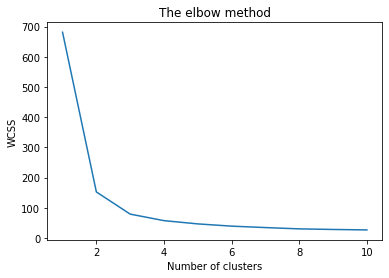

In [25]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [28]:
y_kmeans=kmeans.predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 0, 5, 0, 8, 8, 8, 9, 8, 3, 8, 7, 8, 9, 7, 3, 9, 3, 9, 8,
       3, 9, 3, 9, 1, 3, 1, 3, 3, 8, 8, 8, 3, 9, 9, 9, 9, 1, 3, 3, 8, 3,
       9, 9, 9, 3, 9, 7, 9, 3, 3, 3, 7, 9, 4, 1, 6, 4, 4, 2, 9, 6, 6, 2,
       4, 1, 4, 1, 1, 4, 4, 2, 2, 1, 4, 1, 2, 1, 4, 6, 1, 1, 4, 6, 6, 2,
       4, 1, 1, 2, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1])

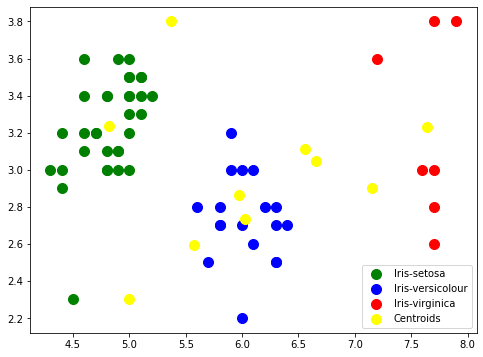

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()